In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import shap

In [2]:
# Read the dataset
df = pd.read_csv('uci-secom.csv')
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df.shape

(1567, 592)

In [4]:
# Overview of the data
print(df.info())
print(df['Pass/Fail'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [5]:
# Check for missing values
df.isnull().sum()

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


**Data Preprocessing and EDA**

In [6]:
#Handling missing values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:-1] = imputer.fit_transform(df.iloc[:, 1:-1])

In [7]:
df.isnull().sum()

,0
Time,0
0,0
1,0
2,0
3,0
...,...
586,0
587,0
588,0
589,0


In [8]:
unique_vals = df['Pass/Fail'].unique()
unique_vals

array([-1,  1])

In [9]:
targets = [df.loc[df['Pass/Fail'] == val] for val in unique_vals]

<ipython-input-10-df87563f0418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
<ipython-input-10-df87563f0418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
<ipython-input-10-df87563f0418>:10: UserWarning: 

`distplot` is a

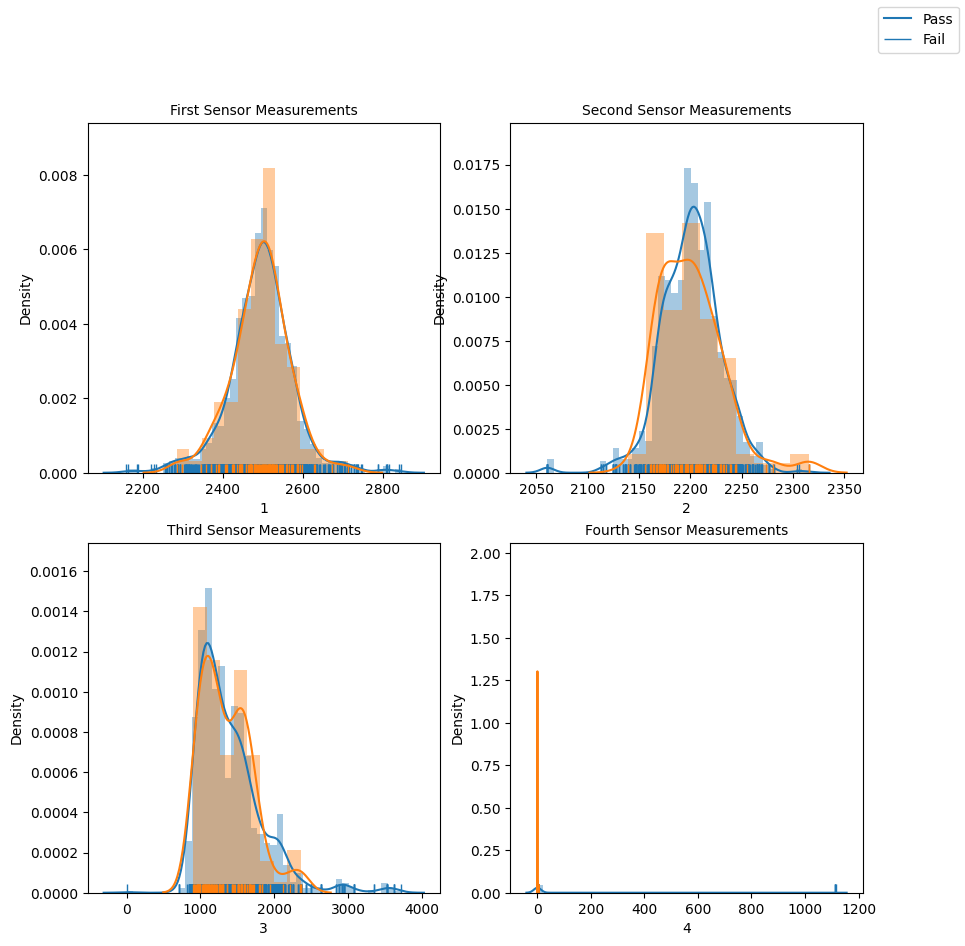

In [10]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 10)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 10)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 10)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 10)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

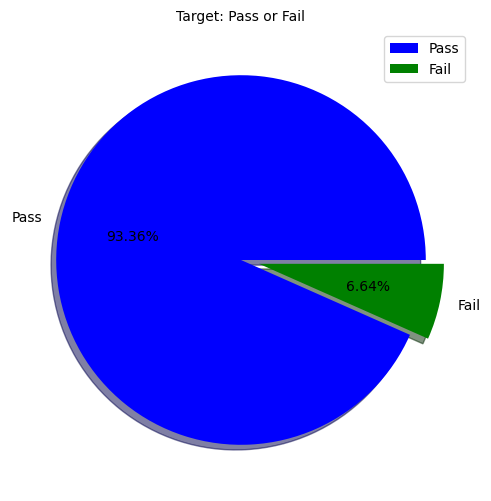

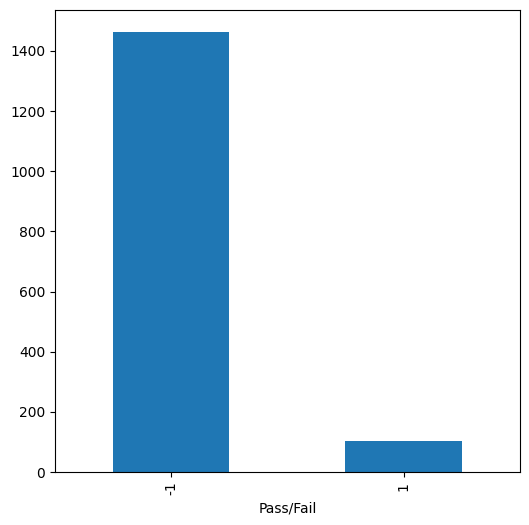

In [11]:
#pie chart
labels = ['Pass','Fail']
size = df['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]


plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 10)
plt.legend()
plt.show()
df['Pass/Fail'].value_counts().plot(kind="bar");

We can see that it is highly imbalanced with only 6.64% failures and 93.36% pass.

Text(0.5, 1.0, 'Correlation heatmap for the Data')

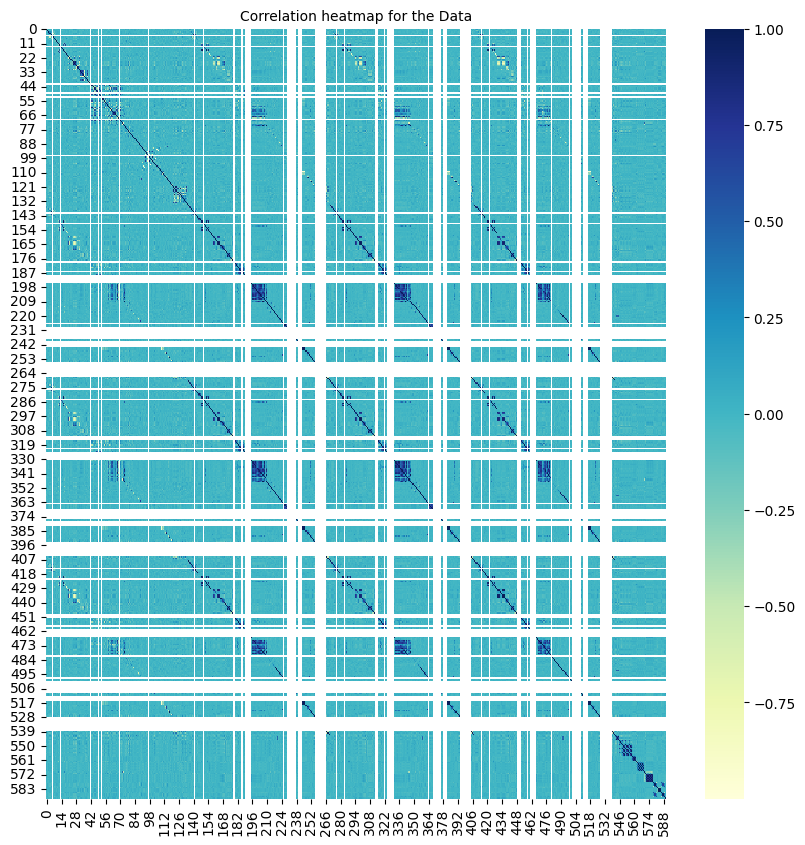

In [12]:
#heatmap for correlation analysis
plt.rcParams['figure.figsize'] = (10, 10)
# Exclude the 'Time' column from the correlation calculation
sns.heatmap(df.drop(columns=['Time']).corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 10)

The lot of gaps (white spaces) we see in the matrix is because some features have the same value throughout, that is, no variance

In [13]:
# Remove low variance Features
def remove_low_variance_features(X, threshold=0.0001):
    """
    Removes features with variance below a given threshold.
    """
    var_thresh = VarianceThreshold(threshold=threshold)
    X_reduced = var_thresh.fit_transform(X)
    return pd.DataFrame(X_reduced)

In [14]:
# Prepare the features (drop 'Time' and 'Pass/Fail') and target
X = df.iloc[:, 1:-1]  # Exclude 'Time' and 'Pass/Fail'
y = df['Pass/Fail']

In [15]:
# Remove low-variance features
X = remove_low_variance_features(X)
print("Shape after removing low-variance features:", X.shape)

Shape after removing low-variance features: (1567, 417)


In [16]:
#Remove the highly collinear features from the data
def remove_collinear_features(x, threshold):
    '''
        Remove the collinear features from the dataset where a correlation coefficient is
        greater than the threshold. Removing collinear features can help the model to generalize
        and improve the interpretability of the model.
    '''
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [17]:
# Remove highly collinear features
X = remove_collinear_features(X, threshold=0.8)
print("Shape after removing collinear features:", X.shape)

22 | 21 | 0.82
23 | 21 | 0.98
26 | 25 | 0.86
32 | 30 | 1.0
41 | 40 | 0.81
44 | 41 | 0.9
47 | 46 | 0.94
51 | 38 | 0.9
56 | 55 | 0.84
57 | 41 | 0.82
60 | 57 | 0.9
63 | 62 | 0.84
81 | 80 | 0.87
95 | 93 | 0.94
96 | 93 | 0.89
96 | 95 | 0.86
99 | 94 | 0.96
102 | 94 | 0.83
111 | 4 | 1.0
116 | 12 | 0.89
117 | 12 | 0.97
117 | 116 | 0.89
120 | 12 | 0.98
120 | 116 | 0.9
120 | 117 | 0.99
121 | 12 | 0.87
121 | 116 | 0.8
121 | 117 | 0.94
121 | 120 | 0.89
122 | 15 | 0.81
131 | 126 | 0.8
131 | 130 | 0.92
132 | 130 | 0.9
132 | 131 | 0.96
141 | 139 | 1.0
151 | 150 | 0.83
154 | 58 | 0.86
155 | 58 | 0.86
155 | 154 | 0.9
157 | 58 | 0.81
157 | 154 | 0.94
157 | 155 | 0.83
160 | 64 | 0.83
160 | 159 | 0.8
161 | 154 | 0.81
161 | 157 | 0.8
161 | 160 | 0.84
162 | 58 | 0.9
162 | 154 | 0.87
162 | 155 | 0.82
162 | 157 | 0.83
163 | 58 | 0.87
163 | 154 | 0.86
163 | 155 | 0.84
163 | 157 | 0.8
163 | 162 | 0.83
164 | 64 | 1.0
164 | 160 | 0.83
165 | 58 | 0.86
165 | 154 | 0.92
165 | 155 | 0.87
165 | 157 | 0.88
165 | 161 | 

In [18]:
# Address Class Imbalance Using SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
Pass/Fail
-1    1023
 1    1023
Name: count, dtype: int64


In [19]:
#Standardization
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

**Random Forest**

In [20]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [21]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       440
           1       0.33      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.63      0.51      0.51       471
weighted avg       0.90      0.93      0.91       471



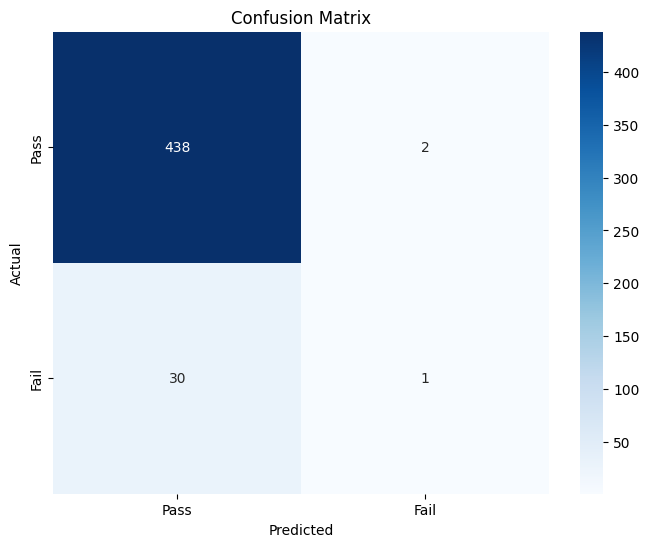

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
conf_matrix

array([[438,   2],
       [ 30,   1]])

In [24]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.74


 99%|===================| 935/942 [00:15<00:00]       


Feature Importance (SHAP Summary):


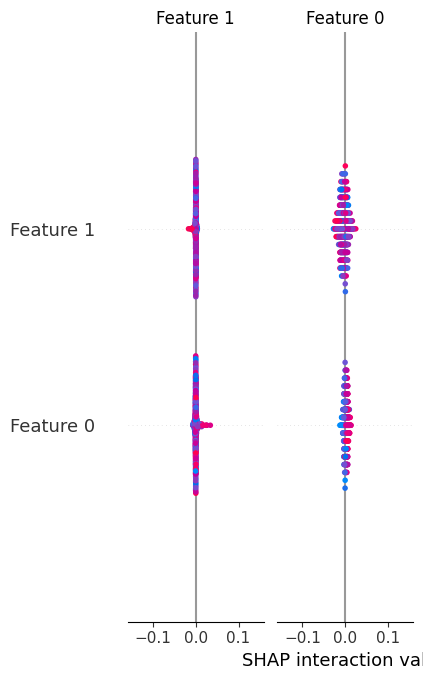

In [25]:
#Feature Importance
explainer = shap.Explainer(clf, X_train_smote)
shap_values = explainer(X_test)

print("\nFeature Importance (SHAP Summary):")
shap.summary_plot(shap_values, X_test)

Comparing different models

In [26]:
# Define a function for model training and evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nModel: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC Score: {roc_auc:.2f}")
    return conf_matrix

In [27]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "SVM (Linear Kernel)": SVC(probability=True, kernel='linear', random_state=1),
}


In [28]:
# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train_smote, X_test, y_train_smote, y_test)


Model: RandomForestClassifier
              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       440
           1       0.33      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.63      0.51      0.51       471
weighted avg       0.90      0.93      0.91       471

ROC-AUC Score: 0.75

Model: LogisticRegression
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       440
           1       0.10      0.16      0.12        31

    accuracy                           0.85       471
   macro avg       0.52      0.53      0.52       471
weighted avg       0.88      0.85      0.86       471

ROC-AUC Score: 0.67

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       440
           1       0.28      0.16      0.20        31

    accuracy                           0.92      

In [31]:
results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1-Score": f1_score(y_test, y_pred, pos_label=1),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Random Forest  0.932059   0.333333  0.032258  0.058824  0.747984
1  Logistic Regression  0.847134   0.098039  0.161290  0.121951  0.674927
2    Gradient Boosting  0.917197   0.277778  0.161290  0.204082  0.677493
3  SVM (Linear Kernel)  0.851380   0.102041  0.161290  0.125000  0.650440


We can see that the best model is Random Forest